In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
# Function to download historical stock data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
# Function to preprocess stock data for LSTM
def preprocess_data_for_lstm(data, target_column='Close'):
    df = data.reset_index()[['Date', target_column, 'Volume']]
    df.set_index('Date', inplace=True)
    return df

In [4]:
# Function to create sequences and labels for training the LSTM model
def create_sequences_and_labels(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values  # Using all features
        label = data.iloc[i + sequence_length, 0]  # Using the 'Close' column
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [5]:
# Function to build an LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh', input_shape=input_shape)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(LSTM(32, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error')
    return model

In [6]:
# Function to plot actual and predicted stock prices
def plot_predictions_lstm(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual['Close'], label='Actual Price', color='blue', marker='o', markersize=4, linestyle='-', linewidth=1.5)
    plt.plot(actual.index, predicted, label='Predicted Price', color='red', linestyle='--', marker='x', markersize=4, linewidth=1.5)
    plt.title('Stock Price Prediction (LSTM)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price', fontsize=14)
    plt.legend(fontsize=12, loc='upper left')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

In [7]:
# Function to calculate and display accuracy metrics
def calculate_accuracy(y_actual, y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    mape = mean_absolute_percentage_error(y_actual, y_predicted) * 100  # Convert to percentage
    accuracy = 100 - mape  # Accuracy as percentage
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy of the Model: {accuracy:.2f}%")
    return rmse, mape, accuracy

[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0350 - val_loss: 0.0800
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0300 - val_loss: 0.0681
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0240 - val_loss: 0.0566
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0198 - val_loss: 0.0456
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - val_loss: 0.0352
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - val_loss: 0.0258
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0077 - val_loss: 0.0176
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - val_loss: 0.0111
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

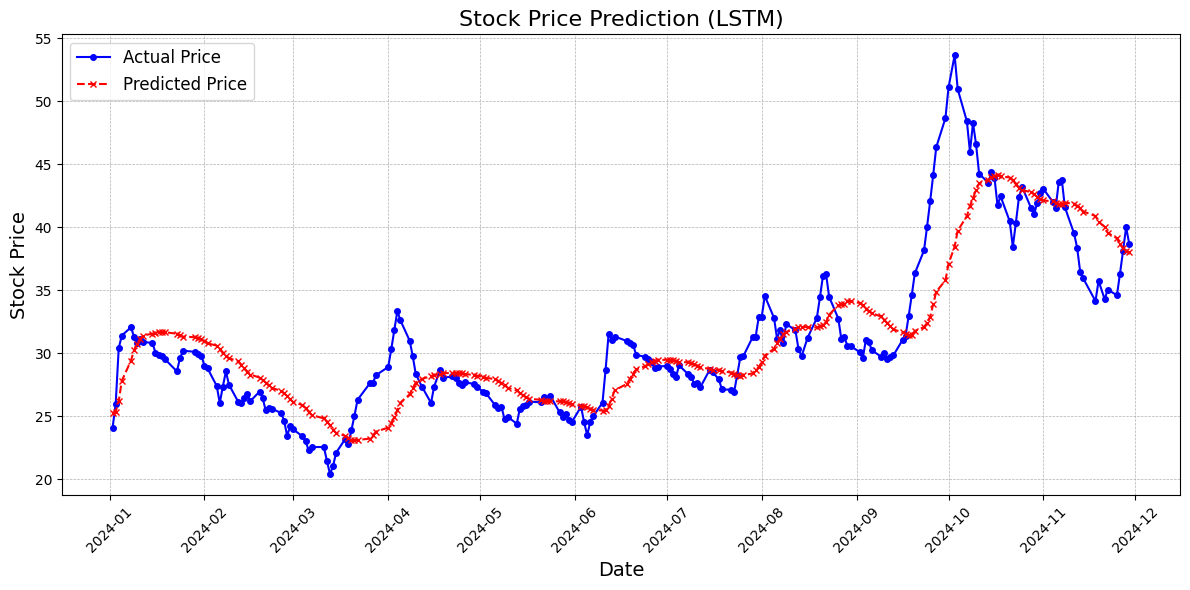

In [8]:
# Main function
def main():
    # Define stock parameters for Reliance Industries Limited
    ticker = 'RPOWER.NS'
    start_date = '2020-01-01'
    end_date = '2024-12-01'
    sequence_length = 100  # Adjust as needed

    # Download stock data
    stock_data = download_stock_data(ticker, start_date, end_date)

    # Preprocess data for LSTM
    lstm_data = preprocess_data_for_lstm(stock_data)

    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(lstm_data)

    # Create sequences and labels
    X, y = create_sequences_and_labels(pd.DataFrame(normalized_data), sequence_length)

    # Reshape input for LSTM
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build and train the improved LSTM model
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform the predictions to get actual prices
    y_pred_actual = scaler.inverse_transform(np.hstack([y_pred, np.zeros((y_pred.shape[0], normalized_data.shape[1] - 1))]))[:, 0]

    # Inverse transform the actual prices
    y_test_actual = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], normalized_data.shape[1] - 1))]))[:, 0]

    # Calculate accuracy metrics
    calculate_accuracy(y_test_actual, y_pred_actual)

    # Displaying the actual and predicted prices
    print("Actual Prices:")
    print(pd.DataFrame({'Date': lstm_data.index[train_size + sequence_length:], 'Actual': y_test_actual.flatten()}))
    print("\nPredicted Prices:")
    print(pd.DataFrame({'Date': lstm_data.index[train_size + sequence_length:], 'Predicted': y_pred_actual.flatten()}))

    # Plot actual vs. predicted prices
    plot_predictions_lstm(lstm_data.iloc[train_size + sequence_length:], y_pred_actual.flatten())

if __name__ == "__main__":
    main()